In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
N = len(data)
d = len(data.columns)
ads_selected = []
n_rewards_1 = [0] * d
n_rewards_0 = [0] * d
total_reward = 0

In [4]:
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(n_rewards_1[i] + 1, n_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data.iloc[n, ad]
    
    if reward == 1:
        n_rewards_1[ad] = n_rewards_1[ad] + 1
    else:
        n_rewards_0[ad] = n_rewards_0[ad] + 1
        
    total_reward = total_reward + reward
        
    

In [5]:
total_reward

2586

Text(0,0.5,'Instances')

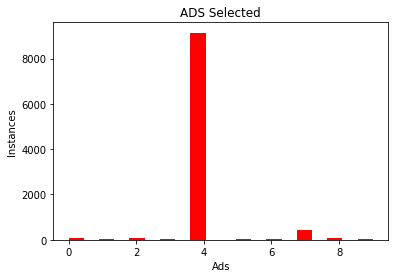

In [7]:
plt.hist(ads_selected, bins = 20, color='r')
plt.title('ADS Selected')
plt.xlabel('Ads')
plt.ylabel('Instances')